In [1]:
import torch
 
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
 
print("using", device, "device")

using cuda device


In [2]:
pip install dis-bg-remover

Note: you may need to restart the kernel to use updated packages.


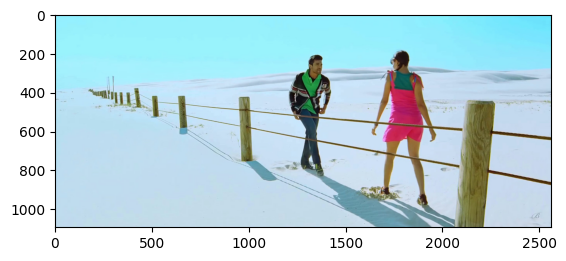

In [3]:
import cv2
import matplotlib.pyplot as plt
image_path = "E:\\My projects\\dis_librarie\\sample_inputs\\frame_0439.jpg"
plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))

In [4]:
from dis_bg_remover import remove_background

model_path = "E:\\My projects\\dis_librarie\\Model_files\\isnet_dis.onnx"

img, mask = remove_background(model_path,image_path)

In [5]:
cv2.imwrite('generated.png', img)
cv2.imwrite('mask.jpg',mask)

True

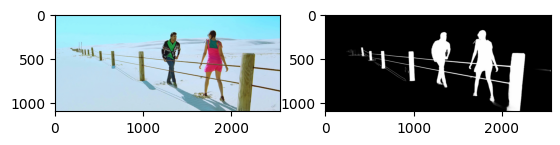

In [6]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_RGBA2BGRA))
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(cv2.cvtColor(mask, cv2.COLOR_RGBA2BGRA))

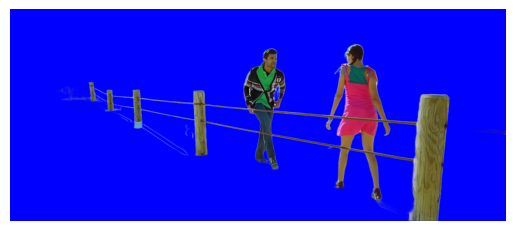

In [7]:
import numpy as np

# Define a solid black background with full opacity
background_color = [255, 0, 0, 255]  # Black in BGRA order with full opacity for the alpha channel

# Create a background image of the same size as our img with 4 channels (including alpha)
background_image = np.full((img.shape[0], img.shape[1], 4), background_color, dtype=np.uint8)

# Create a 3 channel alpha mask for blending, normalized to the range [0, 1]
alpha_mask = (img[:, :, 3] / 255.0).reshape(img.shape[0], img.shape[1], 1)

foreground = img[:, :, :3].astype(np.float32)  # Use only RGB channels of the foreground
background = background_image[:, :, :3].astype(np.float32)  # Use only RGB channels of the background
blended_image = (1 - alpha_mask) * background + alpha_mask * foreground
blended_image = np.uint8(blended_image)

# Convert from BGR to RGB for displaying in Matplotlib
blended_image_rgb = cv2.cvtColor(blended_image, cv2.COLOR_BGR2RGB)

# Display the image with the colored background
plt.imshow(blended_image_rgb)
plt.axis('off')  # Hide the axes
plt.show()
